In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
lowf = 'ThorntonAmonWechsler23_Measurements/LOW_measurements.csv'
midf = 'ThorntonAmonWechsler23_Measurements/MID_measurements.csv'
highf = 'ThorntonAmonWechsler23_Measurements/HIGH_measurements.csv'

low_covf = 'ThorntonAmonWechsler23_Measurements/LOW_cov.csv'
mid_covf = 'ThorntonAmonWechsler23_Measurements/MID_cov.csv'
high_covf = 'ThorntonAmonWechsler23_Measurements/HIGH_cov.csv'

log_sm_distrbf = 'ThorntonAmonWechsler23_Measurements/log_sm_distrb.csv'
z_distrbf = 'ThorntonAmonWechsler23_Measurements/z_distrb.csv'

# Selecting a signal

The ordering of the csv files is such that for a loaded measurement file: <br>
    $R$:     file[0]<br>
    $\Delta\Sigma(R)$:      file[1]<br>
    $\sigma(\Delta\Sigma)$: file[2]

In [3]:
ds_rad, ds_prof, ds_err = np.loadtxt(lowf, delimiter=',', unpack=True)

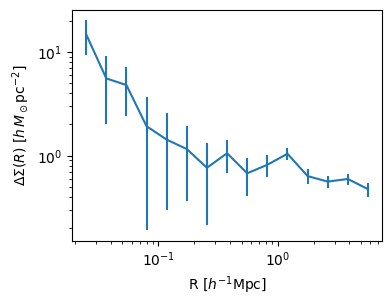

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
                       
ax.errorbar(ds_rad, ds_prof, ds_err)
ax.set_xlabel(r'R [$h^{-1}\rm{Mpc}$]')
ax.set_ylabel(r'$\Delta\Sigma(R)$ [$h \,M_\odot\rm{pc}^{-2}$]')
ax.loglog();

# Using Covariance matrices
The covariance matrices are standard 15x15 arrays.
Our covariances, $C_*$, were obtained through the jackknife method, so we also employ the correction from <span style="color:blue">Hartlap et al. 2007</span>, to produce an unbiased inverse covariance.<br>
$C^{-1} = \frac{n-p-2}{n-1}C^{-1}_*$,<br>
where n is the number of patches (we use $n=150, p=15)

In [5]:
ds_cov = np.loadtxt(low_covf, delimiter=',', unpack=True)

Some examples

In [6]:
ds_cov.shape

(15, 15)

In [7]:
np.diag(ds_cov)

array([3.03892616e+01, 1.24997848e+01, 5.67661805e+00, 2.99465523e+00,
       1.27111089e+00, 6.28644554e-01, 2.99776934e-01, 1.37222100e-01,
       6.97620405e-02, 3.56898663e-02, 1.77163134e-02, 1.02425703e-02,
       5.56320032e-03, 4.81754419e-03, 5.14010858e-03])

In [8]:
np.diag(ds_cov)**.5 == ds_err

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

# Mass and redshift distributions
Both $\log_{10}(M_*/M_\odot)$ and $z$ distributions are stored in the same format.<br>
Bin Centres: file[0]<br>
LOW  Bin Weights: file[1]<br>
MID  Bin Weights: file[2]<br>
HIGH Bin Weights: file[3]<br>
<br>Bins are equally spaced in $\log_{10}(M_*/M_\odot)$ and $z$ respectively<br>
<br>If one wishes to generate the bin edges and centres manually, the edges should be between:<br>
$\log_{10}(M_*/M_\odot)$ : $[4.40, 11.90]$, width = $0.1$<br>
$z$ : $[0.0, 0.4]$, width = $0.01$<br>

In [9]:
bin_centres, low_weights, mid_weights, high_weights = np.loadtxt(log_sm_distrbf, delimiter=',', unpack=True)

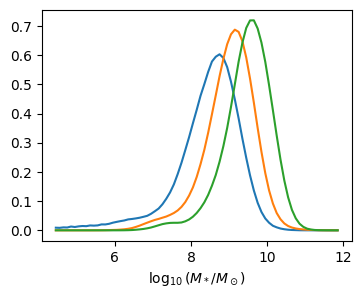

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))

ax.plot(bin_centres, low_weights)
ax.plot(bin_centres, mid_weights)
ax.plot(bin_centres, high_weights)

ax.set_xlabel(r'$\log_{10}(M_*/M_\odot)$');

Or if you wish to display as a histogram

In [11]:
z_centres, low_z_weights, mid_z_weights, high_z_weights = np.loadtxt(z_distrbf, delimiter=',', unpack=True)

z_width = z_centres[1] - z_centres[0]
z_edges = np.append(z_centres - z_width/2, z_centres[-1] + z_width/2)

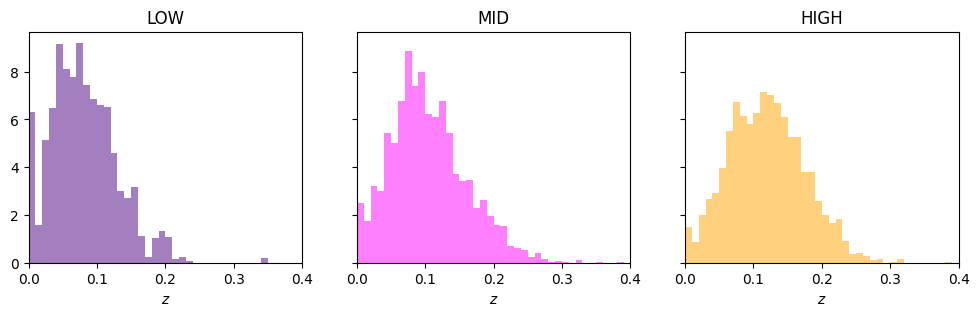

In [12]:
fig, axarr = plt.subplots(1, 3, figsize=(12,3), sharey=True, sharex=True)


axarr[0].hist(z_centres, bins=z_edges, weights=low_z_weights, color='indigo', alpha=0.5)
axarr[1].hist(z_centres, bins=z_edges, weights=mid_z_weights, color='magenta', alpha=0.5)
axarr[2].hist(z_centres, bins=z_edges, weights=high_z_weights, color='orange', alpha=0.5)

for ax in axarr:
    ax.set_xlabel(r'$z$')
    ax.set_xlim(0,0.4)

axarr[0].set_title('LOW')
axarr[1].set_title('MID')
axarr[2].set_title('HIGH');